In [1]:
import tensorflow as tf
from transformers import BertTokenizer,TFBertForSequenceClassification


In [2]:
# Specify the path to the saved model
model_path = r'C:\Users\admin\Desktop\Major project\dataset\modelBert'

# Load the saved model
bert_model = tf.keras.models.load_model(model_path)


In [3]:
bert_model.predict

<bound method Model.predict of <keras.saving.legacy.saved_model.load.TFBertForSequenceClassification object at 0x000001A8093C28C0>>

In [4]:
bert_tokenizer = BertTokenizer.from_pretrained("bert-base-uncased")


In [5]:

new_sequences = ['cocksucker before you piss around on my work','I am very good man.']
data = bert_tokenizer(new_sequences, truncation=True,max_length=100, padding='max_length', return_tensors='tf',return_attention_mask=True)


In [6]:
data['input_ids']

<tf.Tensor: shape=(2, 100), dtype=int32, numpy=
array([[  101, 10338,  6342,  9102,  2077,  2017, 18138,  2105,  2006,
         2026,  2147,   102,     0,     0,     0,     0,     0,     0,
            0,     0,     0,     0,     0,     0,     0,     0,     0,
            0,     0,     0,     0,     0,     0,     0,     0,     0,
            0,     0,     0,     0,     0,     0,     0,     0,     0,
            0,     0,     0,     0,     0,     0,     0,     0,     0,
            0,     0,     0,     0,     0,     0,     0,     0,     0,
            0,     0,     0,     0,     0,     0,     0,     0,     0,
            0,     0,     0,     0,     0,     0,     0,     0,     0,
            0,     0,     0,     0,     0,     0,     0,     0,     0,
            0,     0,     0,     0,     0,     0,     0,     0,     0,
            0],
       [  101,  1045,  2572,  2200,  2204,  2158,  1012,   102,     0,
            0,     0,     0,     0,     0,     0,     0,     0,     0,
            0

In [7]:
token_type_ids=tf.zeros_like(data['input_ids'])

In [8]:
token_type_ids

<tf.Tensor: shape=(2, 100), dtype=int32, numpy=
array([[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]])>

In [9]:
bert_model.predict.__dict__

{'_tf_decorator': <tensorflow.python.util.tf_decorator.TFDecorator at 0x1a807a6f790>,
 '__wrapped__': <function keras.engine.training.Model.predict(self, x, batch_size=None, verbose='auto', steps=None, callbacks=None, max_queue_size=10, workers=1, use_multiprocessing=False)>,
 '__original_wrapped__': <function keras.engine.training.Model.predict(self, x, batch_size=None, verbose='auto', steps=None, callbacks=None, max_queue_size=10, workers=1, use_multiprocessing=False)>,
 '__signature__': <Signature (self, x, batch_size=None, verbose='auto', steps=None, callbacks=None, max_queue_size=10, workers=1, use_multiprocessing=False)>}

In [10]:
inputs={
    'input_ids':data['input_ids'],
    'attention_mask':data['attention_mask'],
    'token_type_ids':token_type_ids

}

In [11]:
# prediction = bert_model.predict([data['input_ids'], data['attention_mask']],)
prediction=bert_model.predict(inputs)

1/1 [==============================] - 3s 3s/step


In [12]:
probabilities = tf.nn.sigmoid(prediction['logits'])

In [13]:
i=0
for pred in probabilities:
  if pred >0.5 :
    print('toxic :: ',new_sequences[i])
  else:
    print('non toxic  :: ',new_sequences[i])
  i+=1



toxic ::  cocksucker before you piss around on my work
non toxic  ::  I am very good man.


In [14]:
import pandas as pd

In [15]:
df = pd.read_csv(r"C:\Users\admin\Desktop\Major project\dataset\cleanTestDataOne.csv")

In [16]:
textData=[]

for i in range(len(df['text'])):
  if i is not None:
    textData.append(str(df['text'][i]))
   

In [17]:
#textData=len(textData)/2
#textData=[str(i) for i in df['text'].values]

In [18]:
data = bert_tokenizer(textData, truncation=True,max_length=86, padding='max_length', return_tensors='tf',return_attention_mask=True)


In [19]:
token_type_ids=tf.zeros_like(data['input_ids'])

In [20]:
inputs={
    'input_ids':data['input_ids'],
    'attention_mask':data['attention_mask'],
    'token_type_ids':token_type_ids
}

In [21]:
predictions = bert_model.predict(inputs)

4787/4787 [==============================] - 21454s 4s/step


In [22]:
probabilities = tf.nn.sigmoid(predictions['logits'])

In [23]:
probabilities

<tf.Tensor: shape=(153164, 1), dtype=float32, numpy=
array([[0.9725502 ],
       [0.16869593],
       [0.19088188],
       ...,
       [0.17083901],
       [0.22922646],
       [0.97345424]], dtype=float32)>

In [24]:
import pickle
with open(r'C:\Users\admin\Desktop\Major project\dataset\modelBert.pkl', 'rb') as f:
  pickleF=pickle.load(f)
  
    

In [25]:
accuracy= sum(pickleF['data']['accuracy'])/len(pickleF['data']['accuracy'])
recall=sum(pickleF['data']['recall'])/len(pickleF['data']['recall'])
precision=sum(pickleF['data']['precision'])/len(pickleF['data']['precision'])
accuracy, recall,precision

(0.9557709574699402, 0.9576057195663452, 0.9546964645385743)

In [26]:
length=len(pickleF['data']['accuracy'])
f1=[]
for i in range(0,length):
  N=2*(pickleF['data']['precision'][i]*pickleF['data']['recall'][i])
  D=(pickleF['data']['precision'][i]+pickleF['data']['recall'][i])
  f1.append(N/D)
sum(f1)/length

0.9561426348399138

In [27]:
y1=pickleF['data']['loss']
x=list(range(1,len(pickleF['data']['loss'])+1))
y2=pickleF['data']['val_loss']



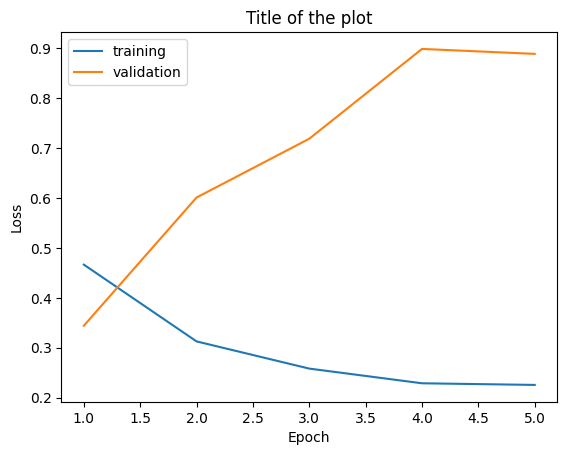

In [28]:
import matplotlib.pyplot as plt
plt.plot( x,y1, label='training')
plt.plot(x ,y2, label='validation')

plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.title('Title of the plot')
plt.legend()
plt.show()




In [29]:
y1=pickleF['data']['accuracy']
x=list(range(1,len(pickleF['data']['accuracy'])+1))
y2=pickleF['data']['val_accuracy']

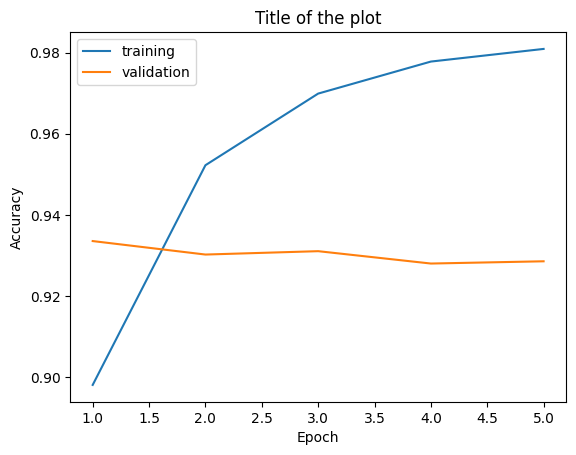

In [30]:
import matplotlib.pyplot as plt
plt.plot( x,y1, label='training')
plt.plot(x ,y2, label='validation')

plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.title('Title of the plot')
plt.legend()
plt.show()




In [31]:
import pytesseract
import pandas as pd
import shutil

import os

import random

try:

    from PIL import Image

except ImportError:

    import Image

In [32]:
image_path=r'C:\Users\admin\Desktop\Major project\testImage.png'

extractedInformation = pytesseract.image_to_string(Image.open(image_path))

In [33]:
extractedInformation

'please feel free to go ahead and\nblock this address it will stop an\nentire country with 300 000\nregistered internet users from\nediting\n\x0c'

In [34]:
import pandas as pd
import string
import contractions

def cleanData(text):
  
    return  contractions.fix(text.translate(str.maketrans('', '', string.punctuation)).replace('\n', ' ').strip()).lower()
 




In [35]:
textData=cleanData(extractedInformation)
textData

'please feel free to go ahead and block this address it will stop an entire country with 300 000 registered internet users from editing'

In [36]:


data = bert_tokenizer(textData, truncation=True,max_length=86, padding='max_length', return_tensors='tf',return_attention_mask=True)


In [37]:
token_type_ids=tf.zeros_like(data['input_ids'])
inputs={
    'input_ids':data['input_ids'],
    'attention_mask':data['attention_mask'],
    'token_type_ids':token_type_ids
}

In [38]:
prediction = bert_model.predict(inputs)

1/1 [==============================] - 0s 218ms/step


In [39]:
probabilities = tf.nn.sigmoid(prediction['logits'])

In [40]:
probabilities

<tf.Tensor: shape=(1, 1), dtype=float32, numpy=array([[0.24250758]], dtype=float32)>

In [41]:
i=0
for pre in probabilities:
  if pre >0.5 :
    print('toxic :: ',textData)
  else:
    print('non toxic  :: ',textData)
  i+=1 

non toxic  ::  please feel free to go ahead and block this address it will stop an entire country with 300 000 registered internet users from editing
